In [2]:
import pandas as pd
import numpy as np
from hyperopt import hp, fmin, tpe
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\19317\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
X_train=pd.read_csv('./model_data/X_train.csv')
X_test=pd.read_csv('./model_data/X_test.csv')
y_train=pd.read_csv('./model_data/y_train.csv')
y_test=pd.read_csv('./model_data/y_test.csv')

model=XGBRegressor()
model.load_model('./model/XGBR.model')

y_pred=model.predict(X_test)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
y_temp=model.predict(X_train)
r2_temp=r2_score(y_train,y_temp)
MSE_temp=mean_squared_error(y_train,y_temp)
print(f'r2 on train: {r2_temp}\n\
MSE on train: {MSE_temp}')

r2 on train: 0.916065596430146
MSE on train: 1699.6420352236676


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

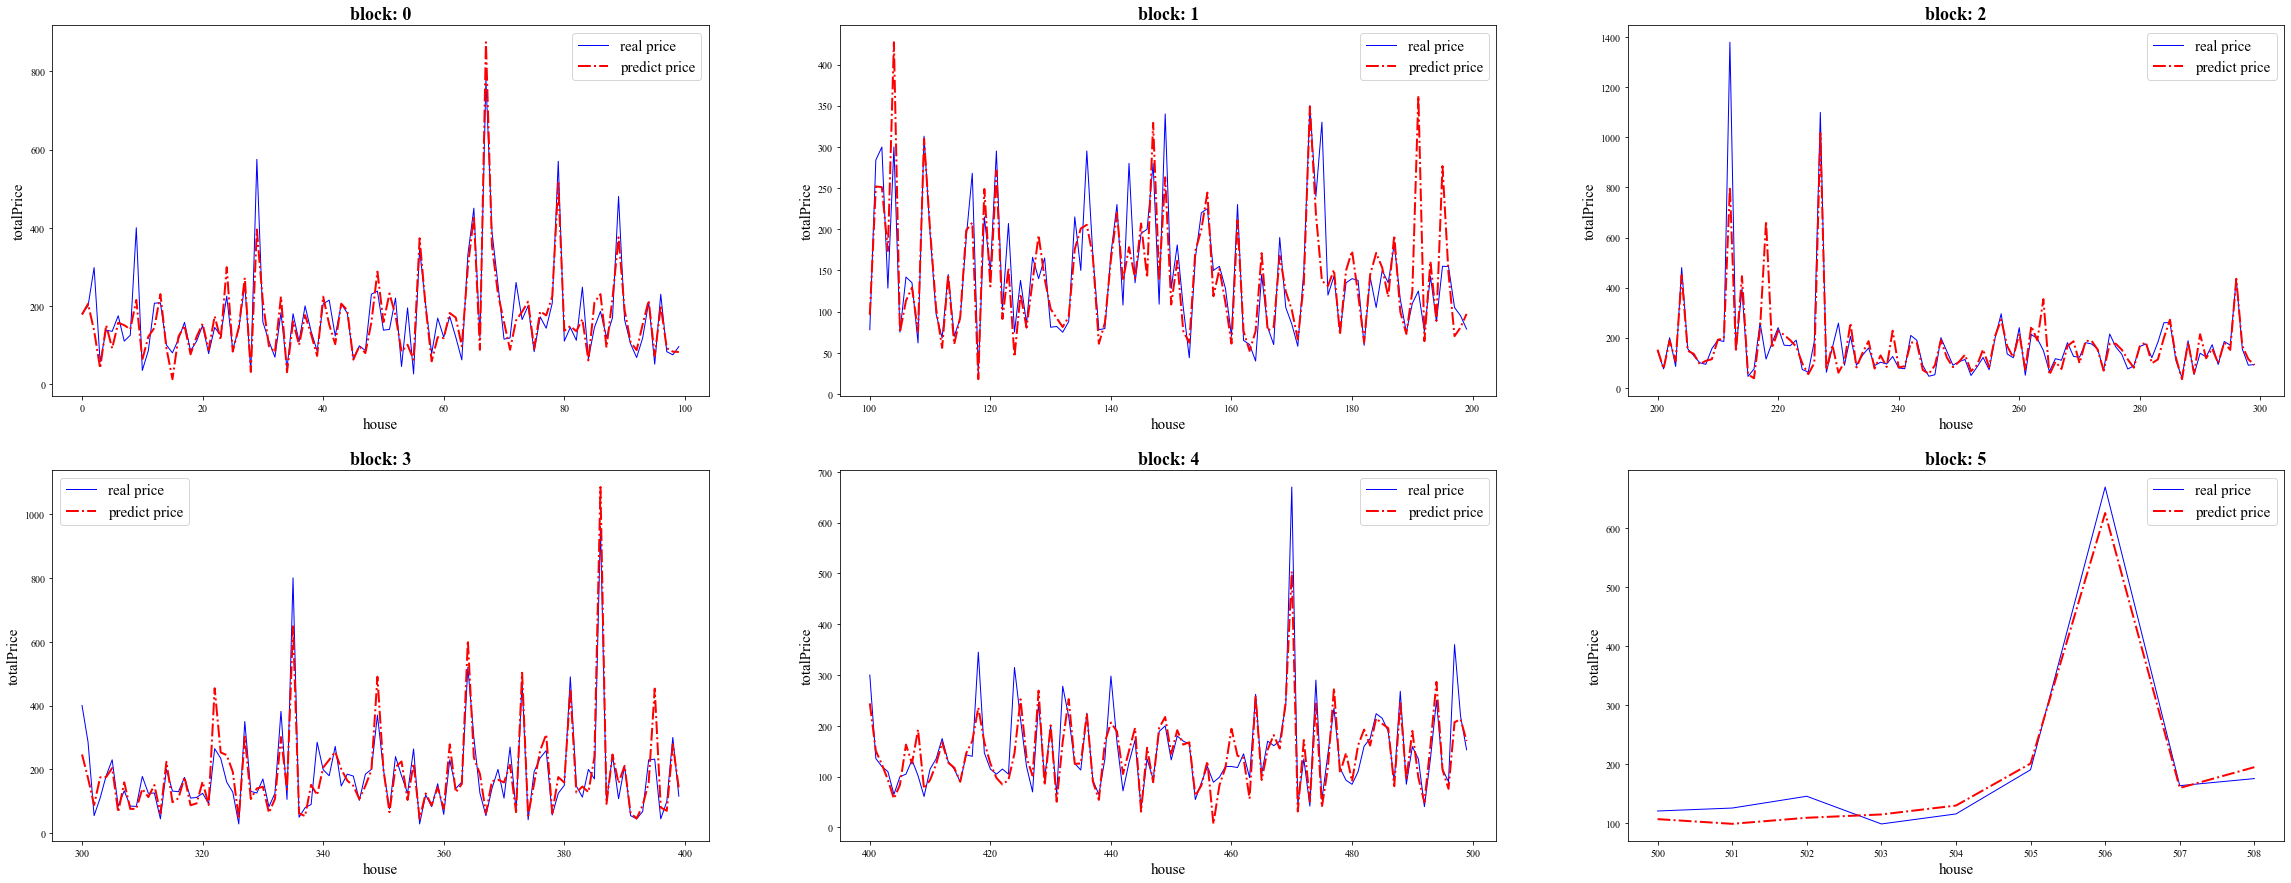

In [5]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout()

f, axes = plt.subplots(2, 3, figsize=(40, 15))
axes=axes.ravel()
block_size=100
for i in range(y_test.size//block_size+1):
    ax=axes[i]
    start=block_size*i
    end=start+block_size 
    if end > y_test.size:
        end=y_test.size
    x=np.arange(start,end)
    ax.plot(x,y_test[start:end].values,'b',lw=1)
    ax.plot(x,y_pred[start:end],'r-.',lw=2)
    ax.set_title(f'block: {i}',fontsize=18,fontweight='bold')
    ax.legend(['real price','predict price'],fontsize=15)
    ax.set_xlabel('house',fontsize=15)
    ax.set_ylabel('totalPrice',fontsize=15)
plt.savefig('./img/Predict_Result.eps',\
    format='eps',bbox_inches='tight',pad_inches=0.0)
plt.show()

In [6]:
importances=pd.DataFrame(model.feature_importances_.reshape(-1,1),\
    index=X_train.columns,columns=['importance'])
importances.sort_values(by='importance',ascending=False,inplace=True)

one_hotted=['region', 'garden', 'renovation', 'heating', 'year',
     'building', 'structure', 'type', 'direction']
the_rest=['area','elevator', 'building_height',
     'est_floor','perStair','layout_room','layout_hall', 
     'layout_kitchen', 'layout_bathroom']

for catergory in one_hotted+the_rest:
     importances.loc[importances.index.str.match(f'{catergory}.*'),'feature']=catergory

group_importances=importances.groupby('feature')\
     ['importance'].sum().sort_values(ascending=False)
display(group_importances)

feature
region             0.269097
garden             0.155423
year               0.142576
area               0.106237
layout_bathroom    0.069425
direction          0.043585
layout_hall        0.041453
structure          0.038544
building           0.035006
layout_room        0.031264
renovation         0.020181
heating            0.015579
building_height    0.011164
perStair           0.010341
elevator           0.010124
est_floor          0.000000
layout_kitchen     0.000000
type               0.000000
Name: importance, dtype: float32

In [7]:
for feature in group_importances.head().index:
    display(importances.loc[importances['feature']==feature,'importance'].head())

region_雁塔          0.168496
region_高陵          0.030564
region_西咸新区（西安）    0.020614
region_灞桥          0.019833
region_碑林          0.019435
Name: importance, dtype: float32

garden_城南      0.038821
garden_高新六路    0.024325
garden_高新一中    0.021197
garden_高新三小    0.014280
garden_曲江      0.012345
Name: importance, dtype: float32

year_满两年    0.132682
year_满五年    0.009894
Name: importance, dtype: float32

area    0.106237
Name: importance, dtype: float32

layout_bathroom    0.069425
Name: importance, dtype: float32